In [3]:
import torch
from torch import nn
from einops import einsum, rearrange

In [7]:
import torch
in_features = torch.tensor([[
        [0, 2, 3],
        [1, 2, 4]
    ],[
        [10, 2, 3],
        [1, 20, 4]
    ]],
)
type(in_features.shape)

torch.Size

In [18]:
in_features

tensor([[[ 0,  2,  3],
         [ 1,  2,  4]],

        [[10,  2,  3],
         [ 1, 20,  4]]])

In [8]:
torch.empty(in_features.shape)

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])

In [12]:
Q = torch.tensor(
    [
        [1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]
    ], dtype=torch.float32
)

K = torch.tensor(
    [
        [0.1, 0.1, 0.1],
        [0.01, 0.01, 0.01]
    ]   
)


# [q1*k1 q1*k2]
# [q2*k1 q2*k2]
# [q3*k1 q3*k2]


# Nq*Mk


einsum(Q, K, "n d, m d -> n m")

tensor([[0.6000, 0.0600],
        [1.5000, 0.1500],
        [2.4000, 0.2400]])

In [104]:
torch.max(in_features, dim=dim, keepdim=True)

torch.return_types.max(
values=tensor([[[ 3],
         [ 4]],

        [[10],
         [20]]]),
indices=tensor([[[2],
         [2]],

        [[0],
         [1]]]))

In [106]:
torch.sum(in_features, dim=dim, keepdim=True)[0]

tensor([[5],
        [7]])

In [92]:
in_features_max = in_features.max(dim=dim).values.unsqueeze(dim=dim)
in_features_max

tensor([[[ 3],
         [ 4]],

        [[10],
         [20]]])

In [1]:
new_in_features

NameError: name 'new_in_features' is not defined

In [95]:
new_in_features = in_features - in_features_max
new_in_features

tensor([[[ -3,  -1,   0],
         [ -3,  -2,   0]],

        [[  0,  -8,  -7],
         [-19,   0, -16]]])

In [96]:
exp_f = torch.exp(new_in_features)
exp_f

tensor([[[4.9787e-02, 3.6788e-01, 1.0000e+00],
         [4.9787e-02, 1.3534e-01, 1.0000e+00]],

        [[1.0000e+00, 3.3546e-04, 9.1188e-04],
         [5.6028e-09, 1.0000e+00, 1.1254e-07]]])

In [100]:
exp_f.sum(dim=dim)


tensor([[1.4177, 1.1851],
        [1.0012, 1.0000]])

In [101]:
exp_f/exp_f.sum(dim=dim)

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 2

In [99]:
exp_f/exp_f.sum(dim=dim).unsqueeze(dim=dim)

tensor([[[3.5119e-02, 2.5950e-01, 7.0538e-01],
         [4.2010e-02, 1.1420e-01, 8.4379e-01]],

        [[9.9875e-01, 3.3504e-04, 9.1075e-04],
         [5.6028e-09, 1.0000e+00, 1.1254e-07]]])

In [80]:
a_max = rearrange(a.max(dim=-1).values, "... -> ... 1")
a_max.shape

torch.Size([2, 2, 1])

In [81]:
a_max

tensor([[[ 3],
         [ 4]],

        [[10],
         [20]]])

In [82]:
a.max(dim=-1).values.unsqueeze(dim=0)

tensor([[[ 3,  4],
         [10, 20]]])

In [74]:
y = a - a_max
y

tensor([[[ -3,  -1,   0],
         [ -3,  -2,   0]],

        [[  0,  -8,  -7],
         [-19,   0, -16]]])

In [75]:
ea  = torch.exp(a)
ea/ea.sum()

tensor([[[2.0611e-09, 1.5229e-08, 4.1397e-08],
         [5.6025e-09, 1.5229e-08, 1.1253e-07]],

        [[4.5398e-05, 1.5229e-08, 4.1397e-08],
         [5.6025e-09, 9.9995e-01, 1.1253e-07]]])

tensor([0.0351, 0.2595, 0.7054])

In [34]:
ea/ea.sum()

tensor([0.0351, 0.2595, 0.7054])

In [39]:
import torch 


x = torch.tensor([[0.1088, 0.1060, 0.6683, 0.5131, 0.0645],
        [0.4538, 0.6852, 0.2520, 0.3792, 0.2675],
        [0.4578, 0.3357, 0.6384, 0.0481, 0.5612],
        [0.9639, 0.8864, 0.1585, 0.3038, 0.0350],
        [0.3356, 0.9013, 0.7052, 0.8294, 0.8334],
        [0.6333, 0.4434, 0.1428, 0.5739, 0.3810],
        [0.9476, 0.5917, 0.7037, 0.2987, 0.6208],
        [0.8541, 0.1803, 0.2054, 0.4775, 0.8199]])

from einops import reduce, rearrange, einsum

x_max1 = reduce(x, 'b d -> b 1', 'max')
x_max1

tensor([[0.6683],
        [0.6852],
        [0.6384],
        [0.9639],
        [0.9013],
        [0.6333],
        [0.9476],
        [0.8541]])

In [40]:
x_reduce = x -x_max1
x_reduce

tensor([[-0.5595, -0.5623,  0.0000, -0.1552, -0.6038],
        [-0.2314,  0.0000, -0.4332, -0.3060, -0.4177],
        [-0.1806, -0.3027,  0.0000, -0.5903, -0.0772],
        [ 0.0000, -0.0775, -0.8054, -0.6601, -0.9289],
        [-0.5657,  0.0000, -0.1961, -0.0719, -0.0679],
        [ 0.0000, -0.1899, -0.4905, -0.0594, -0.2523],
        [ 0.0000, -0.3559, -0.2439, -0.6489, -0.3268],
        [ 0.0000, -0.6738, -0.6487, -0.3766, -0.0342]])

In [41]:
target  = torch.tensor([1, 0, 2, 2, 4, 1, 4, 0])
target = rearrange(target, "b -> b 1")
target

tensor([[1],
        [0],
        [2],
        [2],
        [4],
        [1],
        [4],
        [0]])

tensor([[0],
        [1],
        [2],
        [3],
        [4],
        [5],
        [6],
        [7]])

In [54]:
batch_indices = torch.arange(x_reduce.shape[0]).unsqueeze(1)
target_p  = x_reduce[batch_indices, target]
target_p = rearrange(target_p, "b 1 -> b")
target_p

tensor([-0.5623, -0.2314,  0.0000, -0.8054, -0.0679, -0.1899, -0.3268,  0.0000])

In [56]:
log_sum_exp = torch.log(reduce(torch.exp(x_reduce), "b m -> b", 'sum'))
log_sum_exp

tensor([1.2654, 1.3446, 1.3996, 1.1891, 1.4481, 1.4252, 1.3159, 1.3043])

In [60]:
ce_loss = - target_p + log_sum_exp


In [62]:
reduce(ce_loss, "b -> ", 'sum')/8

tensor(1.6095)

In [9]:
import torch
x = torch.randn(2, 2)
x

tensor([[-0.0071,  0.6123],
        [ 0.0865, -1.9742]])

In [10]:
x*2

tensor([[-0.0141,  1.2245],
        [ 0.1730, -3.9485]])

In [66]:
from collections.abc import Callable, Iterable
from typing import Optional
import torch
import math


class SGD(torch.optim.Optimizer):
    def __init__(self, params, lr=1e-3):
        if lr < 0:
            raise ValueError(f"Invalid learning rate: {lr}")
        defaults = {"lr": lr}
        super().__init__(params, defaults)

    def step(self, closure: Optional[Callable] = None):
        loss = None if closure is None else closure()
        for group in self.param_groups:
            lr = group["lr"]
            for p in group["params"]:
                if p.grad is None:
                    continue
                
                state = self.state[p] # Get state associated with p.
                t = state.get("t", 0)
                grad = p.grad.data
                p.data -= lr / math.sqrt(t + 1) * grad
                state["t"] = t + 1
        return loss



import matplotlib.pyplot as plt


def train(lr):
    weights = torch.nn.Parameter(5 * torch.randn((10, 10)))
    opt = SGD([weights], lr=lr)

    losses = []
    for t in range(10):
        opt.zero_grad() # Reset the gradients for all learnable parameters.
        loss = (weights**2).mean()
        losses.append(loss.cpu().item())  # Store the loss value
        loss.backward() # Run backward pass, which computes gradients.
        opt.step() # Run optimizer step.


    plt.figure(figsize=(4, 3))
    plt.plot(losses)
    plt.title(f'Training Loss Over Time (lr={lr})')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.yscale('log')  # Use log scale if loss varies by orders of magnitude
    plt.show()


In [73]:
loss

tensor(10.1982, grad_fn=<MeanBackward0>)

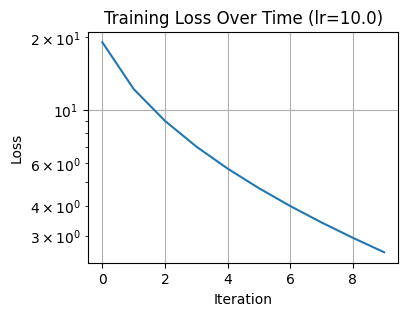

In [67]:
train(1e1)

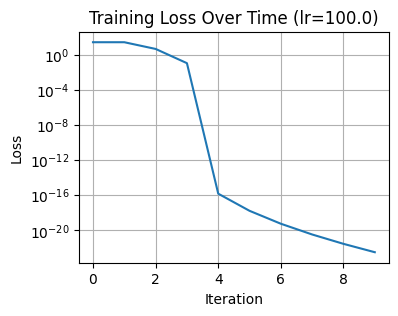

In [68]:
train(1e2)

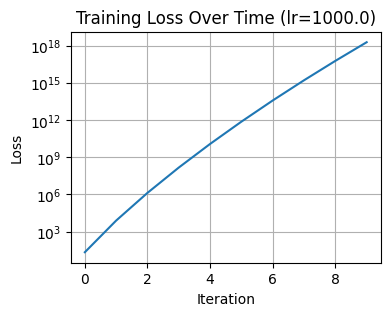

In [69]:
train(1e3)

In [70]:
1e1

10.0

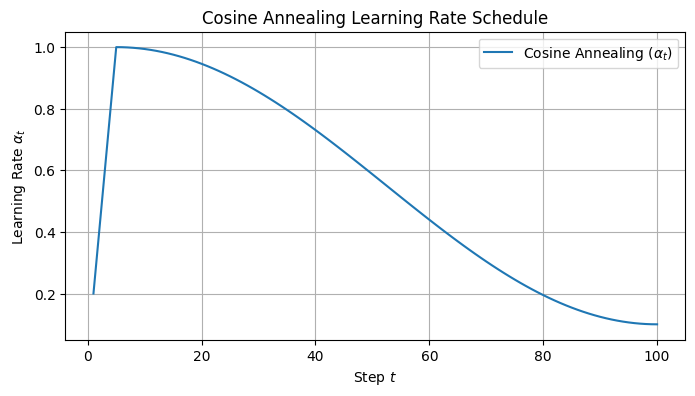

In [25]:
import numpy as np
import matplotlib.pyplot as plt

alpha_max = 1.0
alpha_min = 0.1
Tw = 5
Tc = 100

# warm up
tw_vals = np.arange(1, Tw+1)
alpha_tw = tw_vals*alpha_max/Tw


t_vals = np.arange(Tw+1, Tc+1)
alpha_t = alpha_min + 0.5 * (1 + np.cos((t_vals - Tw) / (Tc - Tw) * np.pi)) * (alpha_max - alpha_min)

t_vals = np.concatenate((tw_vals, t_vals))
alpha_t = np.concatenate((alpha_tw, alpha_t))


plt.figure(figsize=(8,4))
plt.plot(t_vals, alpha_t, label=r'Cosine Annealing ($\alpha_t$)')
plt.xlabel("Step $t$")
plt.ylabel("Learning Rate $\\alpha_t$")
plt.title("Cosine Annealing Learning Rate Schedule")
plt.grid(True)
plt.ylim(alpha_min - 0.05, alpha_max + 0.05)
plt.legend()
plt.show()

array([1, 2, 3, 4, 5])